# 데이터 불러오기

In [1]:
#맨허튼의 주택 임대료와 관련된 데이터

import pandas as pd
import numpy as np

df = pd.read_csv("manhattan.csv")

In [2]:
#데이터 확인
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


# 데이터 셋 분리

In [3]:
#독립변수, 종속변수 설정
#Train 데이터, Test 데이터 분리

from sklearn.model_selection import train_test_split

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

# 독립변수, 종속변수 상관관계 확인

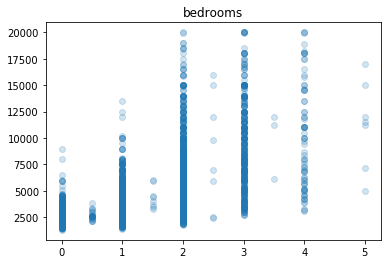

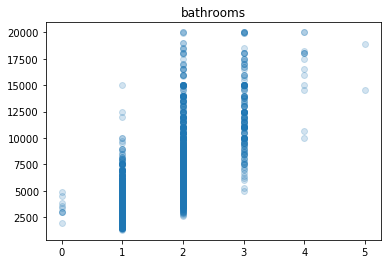

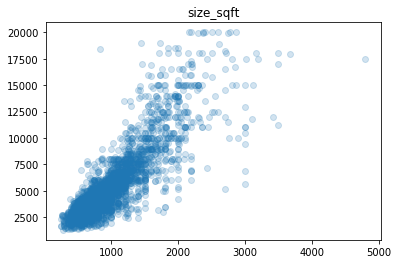

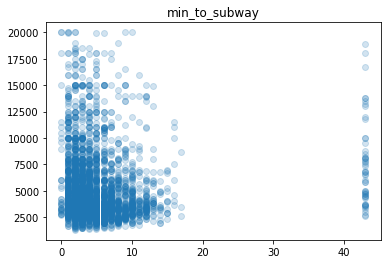

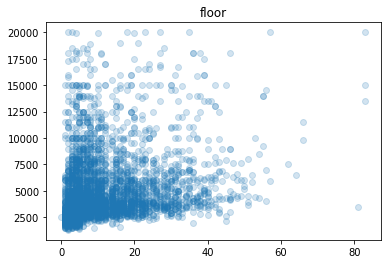

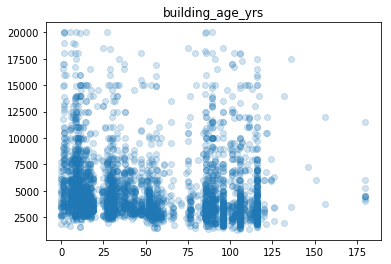

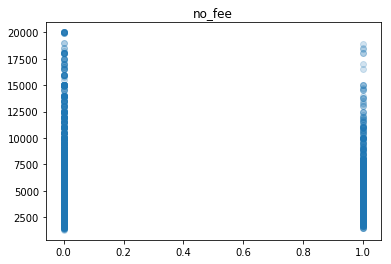

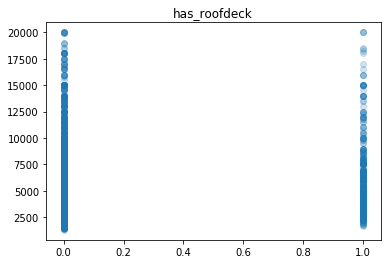

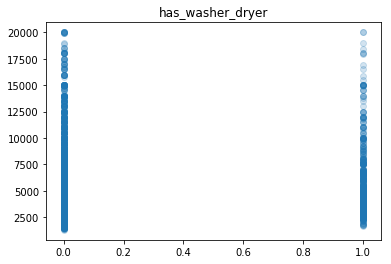

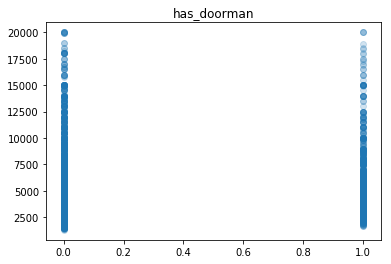

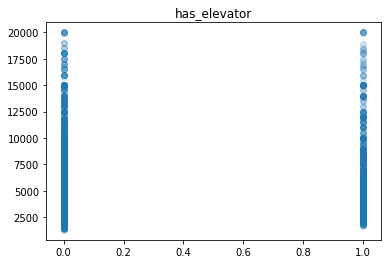

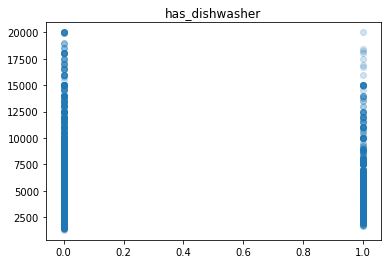

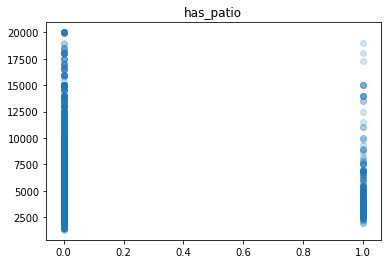

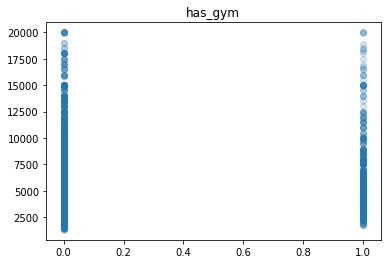

In [4]:
#선형 패턴 확인
#극단값 확인

import matplotlib.pyplot as plt
%matplotlib inline

for i in x.columns:
    plt.scatter(df[[i]], df[['rent']], alpha=0.2)
    plt.title(i)
    plt.show()

# 모델 생성하기

In [5]:
#다중선형회귀 모델 생성

from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

### 다중선형회귀 모델로 임대료 예측

In [6]:
#독립변수 입력
#종속변수 예측

my_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]
my_predict = mlr.predict(my_apartment)

print(my_predict)

[[2228.02959754]]


In [7]:
#Test 데이터의 예측값 저장

y_predict = mlr.predict(x_test)

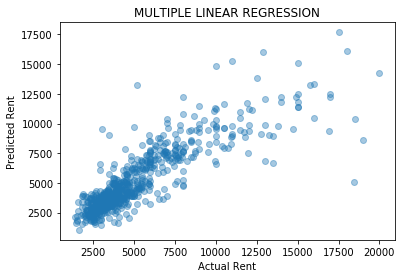

In [8]:
#x축: 실제 임대료, y축: 예측 임대료 

plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

# 회귀계수와 상수 확인

#### y= b0 + b1*x1 + b2*x2 + ··· bn*xn + ε 에서 b값



In [9]:
#회귀계수 확인
#상수 확인

print('회귀계수 값:', mlr.coef_)
print('상수 값:', mlr.intercept_)

회귀계수 값: [[-338.39497251 1092.97876008    5.0277039   -17.01371747   24.97900256
    -7.84261291 -188.67010815   51.11329926  117.09283964 -217.76040993
   189.58871442  -87.62228613 -134.23856925  -72.91841107]]
상수 값: [-334.47594362]


# 모델 평가

In [10]:
#Mean square error, 결정계수 구하기

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_predict)
r_squared = r2_score(y_test, y_predict)

print('MSE:{0:.3f}'.format(mse))
print('Variance score(R-square): {0:.3f}'.format(r_squared))

MSE:2518962.718
Variance score(R-square): 0.741


In [11]:
#수정된 r-squared 구하기
#x_train.shape[1]: 독립변수의 개수

adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print('adjust_r_squared score: {0:.3f}'.format(adjusted_r_squared))

adjust_r_squared score: 0.739


# 다중공선성 문제 확인

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['features'] = x.columns

In [13]:
vif

,VIF Factor,features
0,7.804207,bedrooms
1,16.972750,bathrooms
2,18.068311,size_sqft
3,1.778081,min_to_subway
4,2.324919,floor
5,2.162425,building_age_yrs
6,1.631876,no_fee
7,1.893996,has_roofdeck
8,1.626896,has_washer_dryer
9,3.286035,has_doorman


# 잔차분석

#### - 모형의 선형성

#### 모든 예측값에서 잔차가 비슷하게 있어야 한다. <br> 빨간 실선이 점선에서 크게 벗어난다면 예측 값에 따라 잔차가 크게 달라진다는 것

In [14]:
import seaborn as sns

residual = y_test - y_predict

C:\Users\82104\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


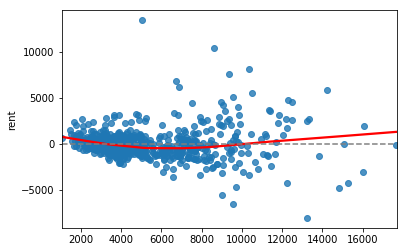

In [15]:
#y_predict는 2차원 -> 1차원으로 변경
#residual은 Dataframe -> array 추출

sns.regplot(y_predict.flatten(), residual['rent'], lowess=True, line_kws={'color': 'red'})
plt.plot([y_predict.min(), y_predict.max()], [0, 0], '--', color='grey')                                                                                                  

#### - 잔차의 정규성
#### 잔차가 정규분포를 따른다고 가정 <br> Sample size가 충분히 크면 중요하지 않다!

C:\Users\82104\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


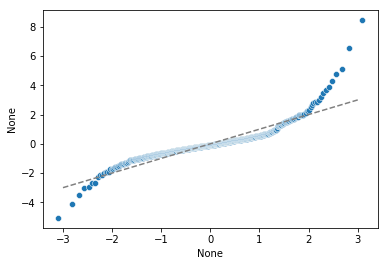

In [16]:
#Normal Q-Q plot

import scipy as sp

sr = sp.stats.zscore(residual['rent'])
(x1, y1), _ = sp.stats.probplot(sr)

sns.scatterplot(x1, y1)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

In [17]:
sp.stats.normaltest(residual['rent'])

NormaltestResult(statistic=341.54053409314565, pvalue=6.845660363801044e-75)

#### - 잔차의 등분산성
#### 예측값의 크기에 따라 잔차의 분산이 동일하다는 가정 <br> 빨간색 실선이 수평선을 그리는 것이 이상적

C:\Users\82104\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


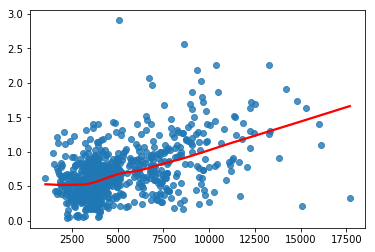

In [18]:
#X축: 예측값
#Y축: 표준화 잔차

sns.regplot(y_predict.flatten(), np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

#### - 극단값
#### Reverage: 각 관측치가 회귀분석에 미치는 영향력 <br> cook's distance를 이용해 Leverage가 크면서 잔차도 큰 데이터를 찾는다.

C:\Users\82104\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\82104\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


<bound method Visualizer.show of CooksDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001917FE6B278>)>

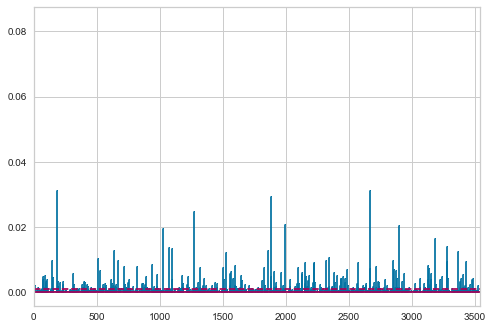

In [22]:
from yellowbrick.regressor import CooksDistance
from yellowbrick.datasets import load_concrete

visualizer = CooksDistance()
visualizer.fit(x, y['rent'])
visualizer.show

In [23]:
visualizer.distance_.sort_values(ascending=False).head(10)

4       0.083369
184     0.031148
2670    0.030973
1883    0.029241
1275    0.024747
1997    0.020542
2901    0.020163
1024    0.019298
3185    0.016209
3276    0.013903
dtype: float64